In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r'Documents\Machine-Learning-with-Python-master\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
print("shape of data set is {}".format(df.shape))

shape of data set is (768, 9)


In [3]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

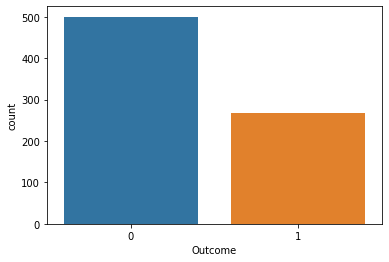

In [4]:
import seaborn as sns
sns.countplot(df['Outcome'],label='count')

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.loc[:,df.columns!='Outcome'],df['Outcome'],stratify=df['Outcome'],random_state=66)
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
612,7,168,88,42,321,38.2,0.787,40
557,8,110,76,0,0,27.8,0.237,58
26,7,147,76,0,0,39.4,0.257,43
70,2,100,66,20,90,32.9,0.867,28
73,4,129,86,20,270,35.1,0.231,23
15,7,100,0,0,0,30.0,0.484,32
168,4,110,66,0,0,31.9,0.471,29
249,1,111,86,19,0,30.1,0.143,23
696,3,169,74,19,125,29.9,0.268,31
461,1,71,62,0,0,21.8,0.416,26


In [26]:
# K-nearest_neighbors classifer
l=[]
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
testing_accuracy = [] 
neighbors = list(range(1,10))
for no_of_neighbors in neighbors:
    kn = KNeighborsClassifier(n_neighbors=no_of_neighbors).fit(x_train,y_train)
    y_pre = kn.predict(x_test)
    print("predicted values of k = {} is ".format(no_of_neighbors))
    print(y_pre)


predicted values of k = 1 is 
[1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0
 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0
 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0
 0 0 1 0 0 0 0]
predicted values of k = 2 is 
[1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 0 0]
predicted values of k = 3 is 
[1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0
 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 

In [9]:
for no_of_neighbors in neighbors:
    kn = KNeighborsClassifier(n_neighbors=no_of_neighbors).fit(x_train,y_train)
    training_accuracy.append(kn.score(x_train,y_train))
    testing_accuracy.append(kn.score(x_test,y_test))
print("list of training accuracy of differnt models")
print(training_accuracy)
print('\n')
print('list of testing accuracy of differnt models')
print(testing_accuracy)

list of training accuracy of differnt models
[1.0, 0.8315972222222222, 0.8333333333333334, 0.7899305555555556, 0.7899305555555556, 0.796875, 0.7881944444444444, 0.7777777777777778, 0.7916666666666666]


list of testing accuracy of differnt models
[0.6875, 0.7239583333333334, 0.6979166666666666, 0.7395833333333334, 0.7395833333333334, 0.7552083333333334, 0.75, 0.7708333333333334, 0.7760416666666666]


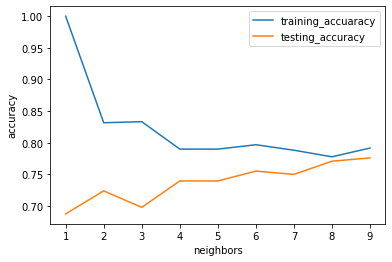

In [10]:
plt.plot(neighbors,training_accuracy,label="training_accuaracy")
plt.plot(neighbors,testing_accuracy,label="testing_accuracy")
plt.ylabel('accuracy')
plt.xlabel('neighbors')
plt.legend()
plt.savefig('knn_accuracy_comapare_model')

In [27]:
# from the above figure we can say that we have to neighbor some where around 9
kn = KNeighborsClassifier(n_neighbors = 9).fit(x_train,y_train)
l.append(kn.score(x_test,y_test))
print("Accuracy of the K-Neares_neighbors_classifer on training set is ",kn.score(x_train,y_train))
print("Accuracy of the K-Neares_neighbors_classifer on testing set is ",kn.score(x_test,y_test))

Accuracy of the K-Neares_neighbors_classifer on training set is  0.7916666666666666
Accuracy of the K-Neares_neighbors_classifer on testing set is  0.7760416666666666


In [28]:
# logistic Regression
from sklearn.linear_model import LogisticRegression
lgre = LogisticRegression().fit(x_train,y_train)
ypre = lgre.predict(x_test)
print("predicted values",ypre)
print("test set values",list(y_test))
l.append(lgre.score(x_test,y_test))
print("Accuracy of Logistic_Regression on training set is ",lgre.score(x_train,y_train))
print("Accuracy of Logistic_Regression on testing set is ",lgre.score(x_test,y_test))


C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


predicted values [1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1
 0 0 0 0 1 0 0]
test set values [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0]

In [29]:
#decision trees

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier().fit(x_train,y_train)
ypre=dtree.predict(x_test)
print("Predicted values of Outcome using Decison Trees classfier")
print(ypre)
print()
print("actual values of Outcome of the order set")
print(list(y_test))
l.append(dtree.score(x_test,y_test))
print("Accuracy of Decision Trees on training set is ",dtree.score(x_train,y_train))
print("Accuracy of Decision Trees on testing set is ",dtree.score(x_test,y_test))

Predicted values of Outcome using Decison Trees classfier
[1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1
 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1
 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1
 1 0 1 1 1 0 0]

actual values of Outcome of the order set
[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 

In [31]:
#support vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))


Accuracy on training set: 1.00
Accuracy on test set: 0.65


C:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
svc = SVC()
svc.fit(x_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(x_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test_scaled, y_test)))


Accuracy on training set: 0.77
Accuracy on test set: 0.77


C:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
svc = SVC(C=1000)
svc.fit(x_train_scaled, y_train)
l.append(svc.score(x_train, y_train))
print("Accuracy on training set: {:.3f}".format(
    svc.score(x_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(x_test_scaled, y_test)))

C:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 0.790
Accuracy on test set: 0.797


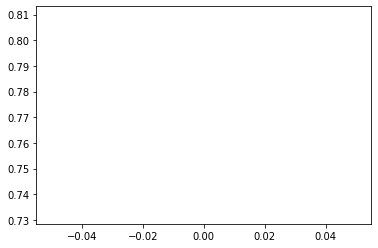

In [39]:
ll=['knn','logreg','decision trees','svm']

